# Automotive e-commerce analytics [STEP 1]

The current task is to analyze the datasets provided and extract actionable insights that can help the company optimize its sales strategy across different platforms.

## 1) Import the libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# custom library
import grafici

## 1.1) Define useful variables

In [56]:
cars = pd.read_csv('Raw_Data/cars.csv')
sales = pd.read_csv('Raw_Data/sales.csv')
users = pd.read_csv('Raw_Data/users.csv')
visits = pd.read_csv('Raw_Data/visits.csv')

## 2) Analyze each file

Now we are going to give a fast overview of the avaiable data, the current objective is to clean all the data based on what we expect to be

## 2.1) Cars

- `car_id`: Unique identifier for the car.
- `car_model`: Model of the car.
- `fuel_type`: Fuel type of the car.
- `release_date`: Date when the car was released.
- `price`: Base price of the car.

In [57]:
cars.shape

(12, 5)

Ok now we know that we don't have that many cars, so if we find something wrong we cannot delete any given row

In [58]:
# thanks to the small size of the data, we can easily see the data
cars

,car_id,car_model,fuel_type,release_date,price
0,2c192c40-f69f-42e5-9431-41d92558568b,Sierra,Diesel,2013-05-01,35000
1,d2e63c70-e732-4299-bb0c-ba00b875a4bd,3 Series,Diesel,2014-12-11,40000
2,00b0c76e-9f2f-41c1-8324-38fbe9c2a8aa,Model i8,Electric,2019-01-01,145000
3,4abc60d6-73cb-44df-8bde-d8f5936bbdfb,Coupe,Gasoline,2015-08-01,65000
4,5fae80e1-82d6-45d3-8512-7db7bb32d5bd,Sedan,Gasoline,2018-07-15,45000
5,4c20c5ec-0d42-46ac-ae0f-cbafeceaca32,Model i7,Electric,2015-03-01,120000
6,ab72e1ef-639f-4ad0-b9b0-28a50f3c7229,Model iX,Electric,2017-11-10,131000
7,eee54c45-64fe-462b-b9c2-e23adea76282,1 Series,Diesel,2010-10-01,30000
8,42a26053-2d52-4926-b19c-ddd4b82c3e75,Touring,Gasoline,2019-02-01,90000
9,0c048ea4-5e29-419e-a448-99f75742117c,Model M,Gasoline,2016-04-01,70000


### 2.1.1) Data checks

we need now to ensure that the data is clean and the staements are been respected

In [59]:
# we can start by checking if there is any null values in the data
cars.isnull().sum().sum()

0

In [60]:
# now we can check the data types of the columns
cars.dtypes

car_id          object
car_model       object
fuel_type       object
release_date    object
price            int64
dtype: object

In [61]:
# convert the release_date column to datetime
cars['release_date'] = pd.to_datetime(cars['release_date'])  # we're going to re-apply this in the next notebook

In [62]:
# check that all the car_id are unique
cars['car_id'].nunique() == cars.shape[0]

True

In [63]:
# just to be sure we can now check the number of unique values in the other columns
cars.nunique()

car_id          12
car_model       12
fuel_type        3
release_date    12
price           12
dtype: int64

Everything seems right, now we can save the cleaned data to analyze it later

### 2.1.2) Null analysis

In [64]:
# nulls
cars.isnull().sum()

car_id          0
car_model       0
fuel_type       0
release_date    0
price           0
dtype: int64

### 2.1.2) Save the cleaned data

In [65]:
# save the cleaned data
cars.to_csv('Cleaned_Data/cars.csv', index=False)

## 2.2) Sales

- `transaction_id`: Unique identifier for the purchase.
- `customer_id`: Identifier for the user who made the purchase.
- `car_id`: Identifier for the car that was purchased.
- `platform`: Platform on which the purchase was made.
- `purchase_date`: Date when the purchase was made.
- `purchase_price`: Final price at which the car was sold after any discounts.
- `user_review`: An optional user review (as a score) given for the platform after each purchase.

In [66]:
# shape
sales.shape

(74836, 7)

In this case we cannot view all the data given the high number of rows, we need to proceed by steps

In [67]:
sales.head(5)

,transaction_id,customer_id,car_id,platform,purchase_date,purchase_price,user_review
0,d8ea7895-4dda-4419-9291-5fe446c8d387,d4a436e4-938c-4281-9c9c-5912be025b19,5fae80e1-82d6-45d3-8512-7db7bb32d5bd,Website,2021-10-14,45000.0,NaN
1,73bba083-92ea-4580-80ef-527193c8a897,1105c980-82a0-4296-8de0-fcb37fbdd435,eee54c45-64fe-462b-b9c2-e23adea76282,Dealership,2022-11-03,30000.0,NaN
2,4150e505-a55e-4eb8-b321-92ed2e96553e,8c987376-6996-4137-977a-5415b81b55d0,ab72e1ef-639f-4ad0-b9b0-28a50f3c7229,Website,2023-12-14,131000.0,NaN
3,5bf1dbeb-6469-4b77-accd-4af5ce6a48a2,9289286a-dece-4d9c-9d64-fafd949f7fb0,0c048ea4-5e29-419e-a448-99f75742117c,Dealership,2023-02-14,70000.0,NaN
4,e7e61ff9-0ac3-4101-b195-369faa256f79,ba30d504-d66f-4879-8af3-999884f2e0f8,eee54c45-64fe-462b-b9c2-e23adea76282,Dealership,2022-07-04,30000.0,1.0


### 2.2.1) Data checks

During the exploration i found out that some values instead of being none they were "data layer field missing" so first of all we want to convert them to np.nan

In [68]:
# using regex search to find all the values that hasn't this pattern: string-string-string-string-string 
# to be able to to that we need to fill the NaN values with an empty string
sales[~sales['customer_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["customer_id"].value_counts()

customer_id
data layer field missing    13
Name: count, dtype: int64

In [69]:
sales[~sales['transaction_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["transaction_id"].value_counts() # no strange values

Series([], Name: count, dtype: int64)

In [70]:
sales[~sales['car_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["car_id"].value_counts() # no strange values

Series([], Name: count, dtype: int64)

As we can see the only value that isn't following the correct pattern is "data layer field missing", we can now replace it with np.nan

In [71]:
# replace the value "data layer field missing" with NaN
sales = sales.replace("data layer field missing", np.nan)

In [72]:
# check the unique values of the platform column
sales['platform'].value_counts()

platform
Dealership    36306
Mobile App    23967
Website       14563
Name: count, dtype: int64

<Axes: >

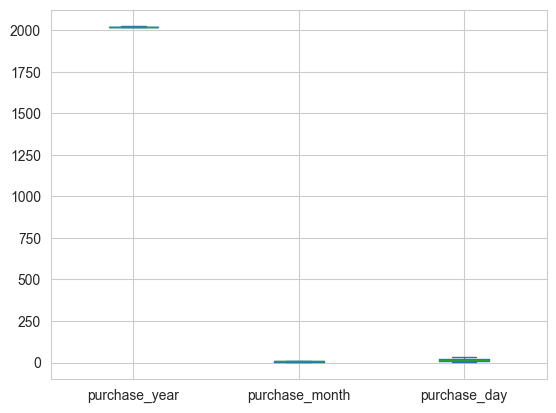

In [73]:
# check the boxplot of the purchase_date column
sales['purchase_date'] = pd.to_datetime(sales['purchase_date'])

# extract the year, month, and day as separate columns
sales['purchase_year'] = sales['purchase_date'].dt.year
sales['purchase_month'] = sales['purchase_date'].dt.month
sales['purchase_day'] = sales['purchase_date'].dt.day

# plot the boxplot for the purchase_year, purchase_month, and purchase_day
sales[['purchase_year', 'purchase_month', 'purchase_day']].plot(kind='box')

<Axes: >

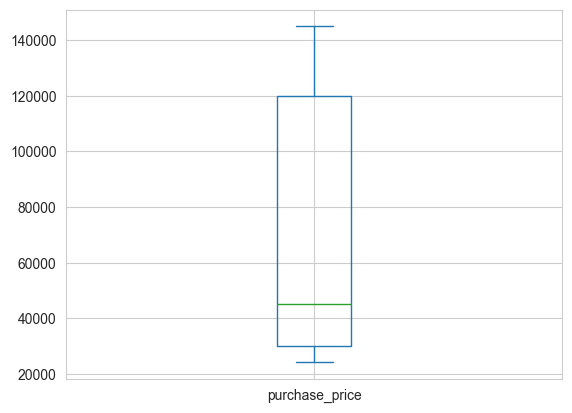

In [74]:
# boxplot for the purchase_price column
sales['purchase_price'].plot(kind='box')

<Axes: >

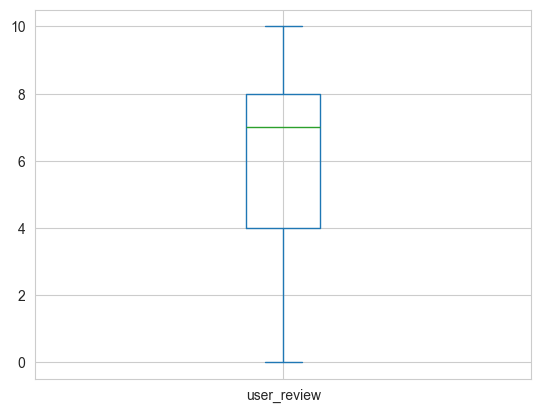

In [75]:
# boxplot for the user_review column
sales['user_review'].plot(kind='box')

Everything seems ok

### 2.2.2) Null analysis

In [76]:
# print all the nulls
sales.isnull().sum()

transaction_id       24
customer_id          37
car_id                0
platform              0
purchase_date         0
purchase_price       32
user_review       65070
purchase_year         0
purchase_month        0
purchase_day          0
dtype: int64

We can see that the "user_review" column contains a lot of missing data, but that's ok

The others null are suspicious, we need to investigate them

In [77]:
# print all the rows that have transaction_id as null
sales[sales['transaction_id'].isnull()]

,transaction_id,customer_id,car_id,platform,purchase_date,purchase_price,user_review,purchase_year,purchase_month,purchase_day
7122,NaN,d1b9e561-b376-4162-9efe-cd41c950f519,2c192c40-f69f-42e5-9431-41d92558568b,Mobile App,2020-09-11,145000.0,0.0,2020,9,11
7521,NaN,f116dfeb-4db4-46bb-84c3-810b4091092d,0c048ea4-5e29-419e-a448-99f75742117c,Mobile App,2020-11-25,120000.0,0.0,2020,11,25
11091,NaN,NaN,5fae80e1-82d6-45d3-8512-7db7bb32d5bd,Mobile App,2020-10-29,60000.0,0.0,2020,10,29
12341,NaN,NaN,4abc60d6-73cb-44df-8bde-d8f5936bbdfb,Mobile App,2021-05-08,65000.0,0.0,2021,5,8
22893,NaN,NaN,2c192c40-f69f-42e5-9431-41d92558568b,Mobile App,2021-07-12,65000.0,0.0,2021,7,12
35093,NaN,91dfa073-e856-47c1-85b6-61ee84130b52,0c048ea4-5e29-419e-a448-99f75742117c,Mobile App,2021-04-05,30000.0,0.0,2021,4,5
41219,NaN,1d6caf85-40ce-409a-84fb-f6efdb5d4fe8,eee54c45-64fe-462b-b9c2-e23adea76282,Mobile App,2021-03-23,70000.0,0.0,2021,3,23
42738,NaN,NaN,2c192c40-f69f-42e5-9431-41d92558568b,Mobile App,2021-01-19,35000.0,0.0,2021,1,19
44725,NaN,NaN,2c192c40-f69f-42e5-9431-41d92558568b,Mobile App,2021-08-03,131000.0,0.0,2021,8,3
47858,NaN,NaN,c571bf78-719f-451e-8cdb-f8bc7376053e,Mobile App,2020-12-08,70000.0,0.0,2020,12,8


Based on this we can see that besides the "data layer field missing" strange value, the rows have almost all the other fields populated, for now we are going to keep them (we can get the hash from the visits)

After some investigation i've decided that given the restricted time that i got and the huge amount of data we can drop the nan's value (if i had more time i would try to get those info by merging the tables or with a KNN for the price)

In [78]:
rows_removed = len(sales) - len(sales.dropna(subset=['transaction_id', 'customer_id', 'car_id']))
print(f"Number of rows removed: {rows_removed}, \npercentage: {rows_removed/len(sales)*100:.2f}%")

Number of rows removed: 45, 
percentage: 0.06%


In [79]:
# drop the rows with null values
sales = sales.dropna(subset=['transaction_id', 'customer_id', 'purchase_price'])

In [80]:
# print all the remaining nulls
sales.isnull().sum()

transaction_id        0
customer_id           0
car_id                0
platform              0
purchase_date         0
purchase_price        0
user_review       65070
purchase_year         0
purchase_month        0
purchase_day          0
dtype: int64

In [81]:
# save the cleaned data
sales.to_csv('Cleaned_Data/sales.csv', index=False)

## 2.3) Users

- `customer_id`: Unique identifier for the user.
- `user_first_name`: First name of the user.
- `user_last_name`: Last name of the user.
- `gender`: Gender of the user.
- `email`: Email address of the user.

In [82]:
users.shape

(138678, 5)

In [83]:
users.head(5)

,customer_id,user_first_name,user_last_name,gender,email
0,414970e2-b5c8-43a5-a91b-c5557b9dbec0,Dwayne,Romero,Male,romero@gmail.com
1,504db575-40df-44e1-806d-16777c2dd6e0,Madison,Burgess,Female,burgess@yahoo.com
2,42af527d-454a-465e-9a74-42d4b174a49e,Kristin,Castro,Female,kristin1992@hotmail.com
3,38dda2e0-61f6-4d63-9427-f5055c9258ff,Jessica,Taylor,Female,jessica@hotmail.com
4,19936993-0480-4399-ab80-9aca3e282d07,Cody,King,Male,king@hotmail.com


### 2.3.1) Data checks

In [84]:
# check with the regex search if there are any strange values in the user_id column
users[~users['customer_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["customer_id"].value_counts()

customer_id
data layer field missing    286
Name: count, dtype: int64

In [85]:
# even here we can see that there is the value "data layer field missing" that we can replace with NaN
users = users.replace("data layer field missing", np.nan)


Categorie per Frequenza:
Frequenza 1: Maximilian, Simon
Frequenza 12: Leroy, Terrance
Frequenza 13: Darin, Perry, Stuart, Wyatt
Frequenza 14: Gene, Gilbert, Leon
Frequenza 15: Diamond, Franklin, Lonnie
Frequenza 16: Isabel, Max, Preston, Rickey, Warren
Frequenza 17: Angie, Dave, Gregg, Herbert, Neil, Vernon
Frequenza 18: Brady, Cristina, Gordon, Guy
Frequenza 19: Alvin, Bernard, Daryl, Tami, Terrence, Yesenia, Zoe
Frequenza 20: Darius, Earl, Hayden, Karl, Malik, Marco, Mindy, Nina, Parker, Priscilla, Tracie
Frequenza 21: Bob, Cesar, Faith, Glenda, Kent, Mia, Pedro, Sally
Frequenza 22: Alfred, Francis, Latasha, Lorraine, Mercedes, Ross
Frequenza 23: Clarence, Doris, Gavin, Jermaine, Karla, Kellie, Kerri, Norman, Sonia, Stefanie
Frequenza 24: Cassie, Gwendolyn, Kiara, Lydia, Mandy, Maxwell, Patty, Ray, Riley, Sheena
Frequenza 25: Damon, Dan, Dominic, Glen, Jackson, Jasmin, Kristie, Marisa, Melody, Nicolas, Rick, Robyn, Shelia
Frequenza 26: Don, Isabella, Ivan, Raven, Shawna, Sue
Frequen

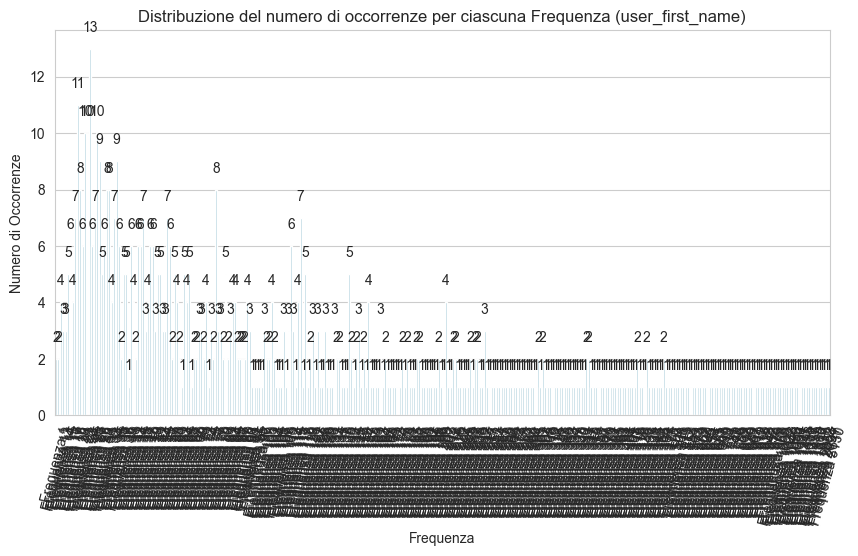

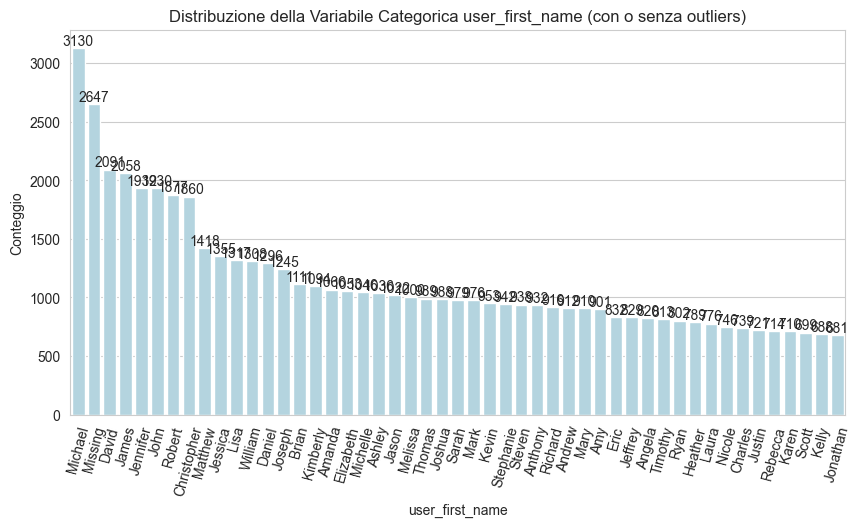

In [86]:
# plot the distribution of the user_first_name column
grafici.plot_categorical_column(users, 'user_first_name', "lightblue", min_percentile=93, max_percentile=100, hide_outliers=True, figsize=(10, 5), anomaly_threshold=0.01)

**Here i've used a function that i've developed for an other project, sadly there are too many frequencies, so it's a bit a mess, but we still can see that there aren't any strange values**


Categorie per Frequenza:
Frequenza 24: Good
Frequenza 27: Kidd
Frequenza 28: Brandt
Frequenza 29: Stanton
Frequenza 30: David, Holder, Mata
Frequenza 31: Bird, Sanford
Frequenza 32: Compton, Murillo, Ritter
Frequenza 33: Cooley, Jarvis, Key, Travis
Frequenza 34: Bonilla, Cuevas, Estes, Mayo
Frequenza 35: Andersen, Blankenship, Bright, Moyer, Odom, Werner
Frequenza 36: Beltran, Conway, Joyce, Levy, Mckay, Mercer, Montes, Shea
Frequenza 37: Cowan, Dickson, Esparza, Glass, Hanna, Lutz, Mcneil, Meza, Oconnell, Terrell
Frequenza 38: Baird, Bender, Booker, Chaney, Church, Davila, Donaldson, Haas, Hays, Richmond, Rivers
Frequenza 39: Duarte, Dudley, Galloway, Gay, Hatfield, Horne, Moses, Potts, Proctor, Rubio, Shepard, Vang, Whitney
Frequenza 40: Acevedo, Bernard, Blevins, Cordova, Kaufman, Mcmillan, Mullen, Sampson
Frequenza 41: Barr, Carney, Choi, Daugherty, Ewing, Forbes, Hickman, Mccann, Mccarty, Nixon, Osborn, Riddle, Weeks
Frequenza 42: Ashley, Berger, Blanchard, Cherry, Cooke, Costa, 

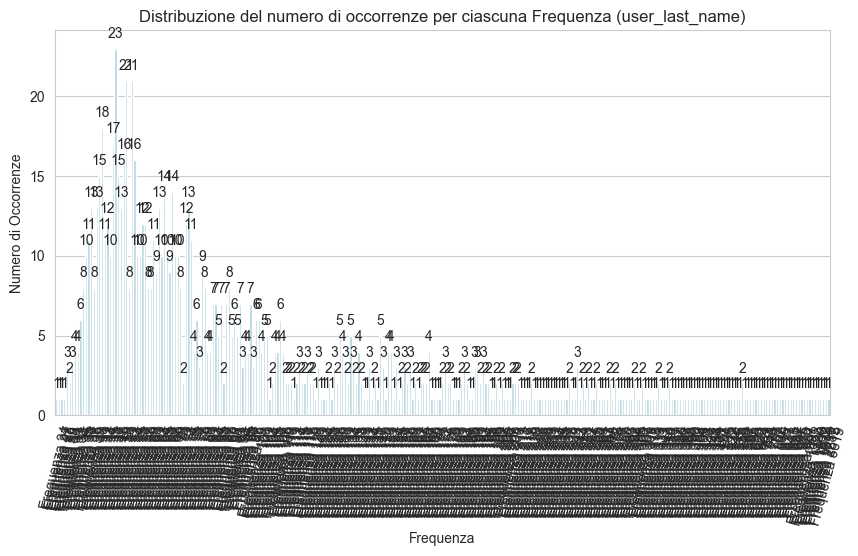

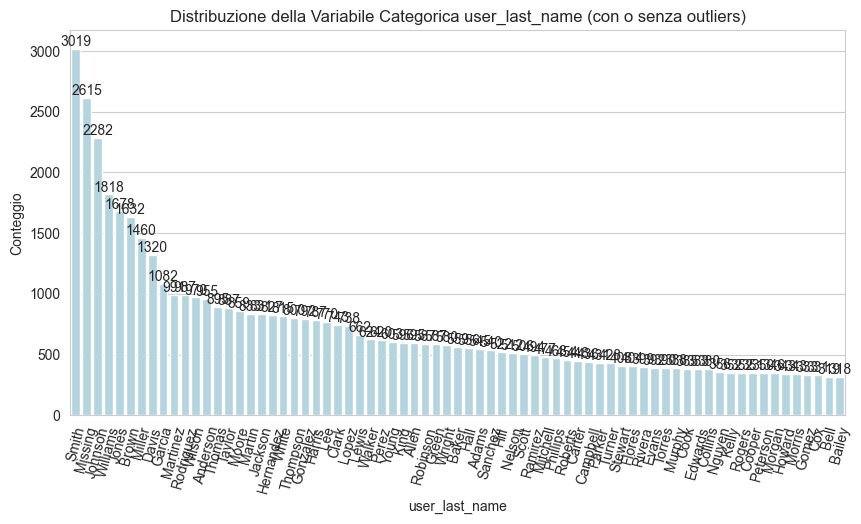

In [87]:
# plot the distribution of the user_first_name column
grafici.plot_categorical_column(users, 'user_last_name', "lightblue", min_percentile=93, max_percentile=100, hide_outliers=True, figsize=(10, 5), anomaly_threshold=0.01)

Sorry for the rough visualization of all this info, but i can't spend time now fixing the graph

Even here we can se that the anomaly forest can't find anything strange

<Axes: xlabel='gender'>

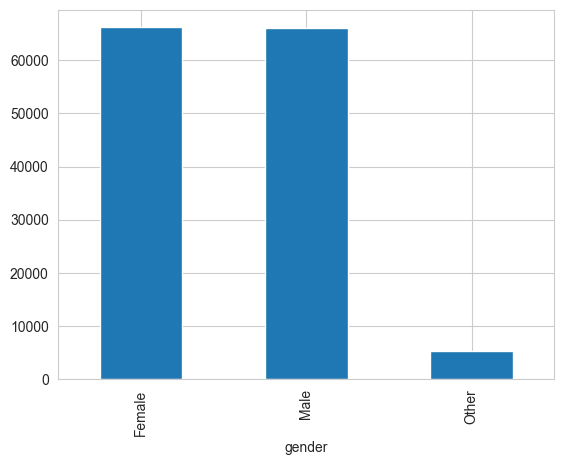

In [106]:
users['gender'].value_counts().plot(kind='bar')

We already replaced the "data layer field missing value" in the gender column

The Other value is really unbalanced

<Axes: ylabel='count'>

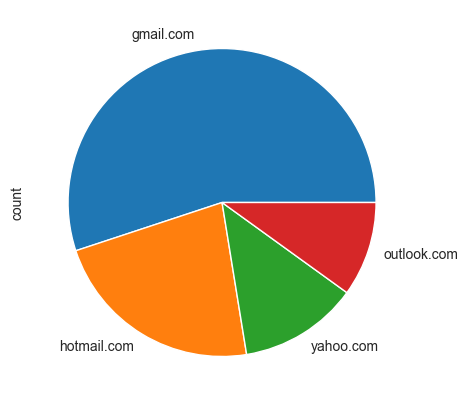

In [89]:
# get a list of all the domains used in the email column
users['email'].str.split('@').str[1].value_counts().plot(kind='pie', figsize=(5, 5))

There's no @icloud.com, interesting

Everything seems right

### 2.3.2) Null analysis

In [90]:
users.shape[0]

138678

In [91]:
# count the null values
users.isnull().sum()

customer_id         840
user_first_name    2647
user_last_name     2615
gender              830
email              2729
dtype: int64

In [92]:
# check how many rows have the customer_id and the gender as null
len(users[(users['customer_id'].isnull()) & (users['gender'].isnull())])

544

So if we drop the rows with customer_id as null, we are going to lose 286 genders info out of 138678 rows, that's not bad

In [93]:
# drop the rows with the customer_id null
users = users.dropna(subset=['customer_id'])

If needed later we can impute the nans for now we can save it

In [94]:
# save the cleaned data
users.to_csv('Cleaned_Data/users.csv', index=False)

## 2.4) Visits

- `visit_id`: Unique identifier for the visit.
- `customer_id`: Identifier for the user who made the visit.
- `start_timestamp`: Timestamp when the visit started (website entry or dealership entry).
- `end_timestamp`: Timestamp when the visit ended.
- `visit_type`: Type of visit (e.g., purchasing, car configuration, testing).
- `transaction_id`: purchase identifier for purchasing visits.

In [95]:
visits.shape

(438587, 6)

In [96]:
visits.head(10)

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id
0,7f94232d-9cca-4893-aebe-9a267a752f87,de5323eb-5e01-481f-b73a-bb78af953894,2023-04-18 10:51:24.477465,2023-04-18 11:46:26.893492,car configuration,NaN
1,dcb32330-15b0-4fd1-b376-9b9335fee7f9,15dcef30-b549-447b-8809-229c9de8526b,2021-03-03 17:54:25.117599,2021-03-03 18:07:25.117599,viewing,NaN
2,8b02d675-1365-45bc-af64-61ef9e79149c,3b656455-1690-47d9-b7ad-9e0aaa3bb229,2023-07-07 13:09:00.000000,2023-07-07 13:19:00.000000,purchasing,d1bfe5f5-edc1-4148-8eb0-8127dd3b52c1
3,bdfc7048-adc5-4da7-a37a-4f9d90cf6436,c583c671-2f8a-47f3-9460-bd444b1811c8,2023-09-14 11:25:12.820271,2023-09-14 12:20:15.523626,car configuration,NaN
4,2ad3a1e1-0b9c-417f-95f7-70607b0fe96e,da8268d8-4e81-4538-bf1d-836ac4d5b155,2020-12-04 19:15:41.833927,2020-12-04 19:27:41.833927,car configuration,NaN
5,e312debd-3da7-4b09-adf5-7584f9757a64,ddc7b33e-2ce2-4d4e-a9ae-af658297b3f9,2023-05-08 08:48:04.039144,2023-05-08 09:43:12.364381,viewing,NaN
6,0cb32f18-13df-46a3-a6ad-e75e52752c97,74da1e99-b941-41fc-80c0-81454f24a6fa,2022-06-17 09:07:00.000000,2022-06-17 09:29:00.000000,purchasing,5f30bffd-d546-4787-9dc9-9dab00a43719
7,1bd012ab-6077-4181-ad90-3c014bea260b,9008d1e1-c4d3-48fa-b9c4-3bcf22d9761b,2023-10-15 09:22:21.711984,2023-10-15 10:17:29.350944,viewing,NaN
8,fa474cb9-dac4-417d-9739-7d351cc8a10e,84d4cdb2-6a5a-4415-808e-e20b02a1788a,2021-10-28 09:21:22.366154,2021-10-28 10:22:22.366154,viewing,NaN
9,d2d29fbf-39bc-490c-b29c-41f388f20dd1,dbdc3442-018d-4bd1-ae3c-ad8c5d72588a,2023-09-09 16:50:29.075540,2023-09-09 17:00:29.075540,viewing,NaN


### 2.4.1) Data checks

In [97]:
# check any strange values in the visit_id column
visits[~visits['visit_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["visit_id"].value_counts()

Series([], Name: count, dtype: int64)

In [98]:
# check any strange values in the customer_id column
visits[~visits['customer_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["customer_id"].value_counts()

Series([], Name: count, dtype: int64)

<Axes: >

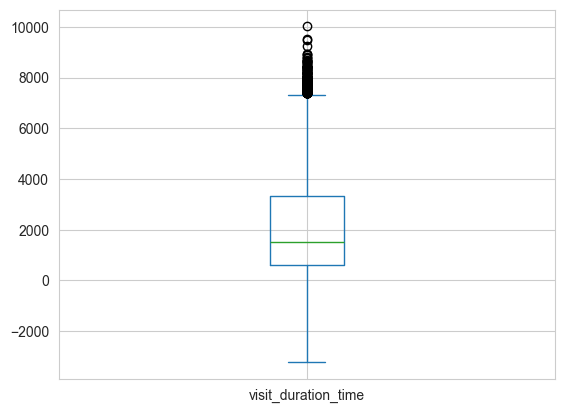

In [99]:
# creating a new column "visit_duration_time" that is the difference between the start_timestamp and the end_timestamp
visits['start_timestamp'] = pd.to_datetime(visits['start_timestamp'])
visits['end_timestamp'] = pd.to_datetime(visits['end_timestamp'])
visits['visit_duration_time'] = visits['end_timestamp'] - visits['start_timestamp']

# check the distribution of the visit_duration_time column
visits['visit_duration_time'].dt.total_seconds().plot(kind='box')

We can see that there's something strange with the negative values

In [100]:
# print the rows that have the end_timestamp < than start_timestamp
visits[visits['end_timestamp'] < visits['start_timestamp']].head(10)

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time
54,76cbcc77-5dce-42c7-ad18-be0aaf14c4c0,4fcab3f2-8ac7-407e-8e3e-4da229d76384,2022-07-03 09:17:02.504868,2022-07-03 09:09:02.504868,testing,NaN,-1 days +23:52:00
65,1ad01c01-929f-4b24-a87b-c7d920bab6b8,f5eba840-47f3-4502-92de-594e03285508,2023-04-30 18:34:49.603612,2023-04-30 18:30:49.603612,viewing,NaN,-1 days +23:56:00
130,6d0af211-ce8e-4e72-9917-62b3543a4613,9b74e1eb-45ed-4680-8e16-e58db216fa2d,2023-08-12 20:05:00.000000,2023-08-12 20:03:00.000000,purchasing,f1b05953-799c-4930-b399-7442e3380758,-1 days +23:58:00
255,8563c3b8-e48e-42a9-bb3a-56d9c295038f,eeacac9c-8c61-4eac-af16-dee0d63381ae,2021-08-07 19:06:47.842724,2021-08-07 18:57:47.842724,testing,NaN,-1 days +23:51:00
345,f52d6e30-97ca-4c6d-aff5-ddb2ee990825,27984fe4-53ef-4cd5-9f9b-7491a4718c10,2022-12-05 09:13:57.073838,2022-12-05 09:09:57.073838,testing,NaN,-1 days +23:56:00
387,2c084bea-b255-4701-927f-96770008ff12,ad2f785a-551a-476e-ad8b-cefedf775027,2023-02-16 19:55:20.349139,2023-02-16 19:54:20.349139,viewing,NaN,-1 days +23:59:00
932,24c76e44-56da-4431-a0ac-d203420fb6bc,f2332d3c-def5-4b2f-bcb8-02f6687051d8,2021-10-22 11:14:23.124399,2021-10-22 10:56:23.124399,viewing,NaN,-1 days +23:42:00
1009,444fac22-8df0-4065-b913-b9c95923d7d0,265413dc-d2e7-47a6-b80a-cc03d2eaa406,2023-12-06 19:50:42.091701,2023-12-06 19:46:42.091701,viewing,NaN,-1 days +23:56:00
1041,5fa67a8e-e843-471c-885a-2e991ca11187,a8809951-11b1-47eb-a147-53b9c7b172e1,2024-01-13 20:39:00.000000,2024-01-13 20:37:00.000000,purchasing,152c991a-dcf8-4018-9faf-053457fdb868,-1 days +23:58:00
1078,b61bf4e7-babb-4297-8da6-a3fa6a202b44,24e7963c-0b92-4ad0-aa38-03bc8aacdd42,2022-10-24 18:55:08.629538,2022-10-24 18:45:08.629538,viewing,NaN,-1 days +23:50:00


it seems that an error occurred, we can just take the absolute values of the difference (in a real world scenario it would be useful to understand why this happen, for now we're just going to proceed)

<Axes: >

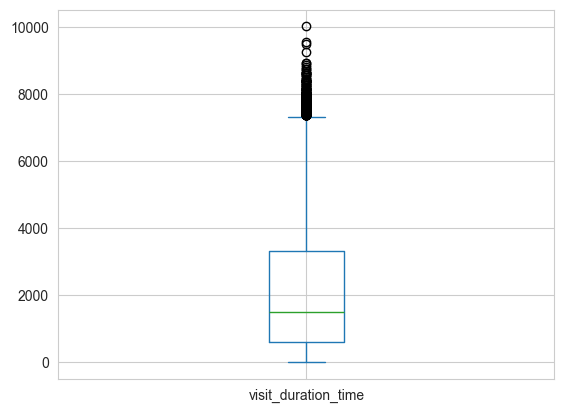

In [101]:
visits['visit_duration_time'] = abs(visits['end_timestamp'] - visits['start_timestamp'])

# check the distribution of the visit_duration_time column
visits['visit_duration_time'].dt.total_seconds().plot(kind='box')

<Axes: xlabel='visit_type'>

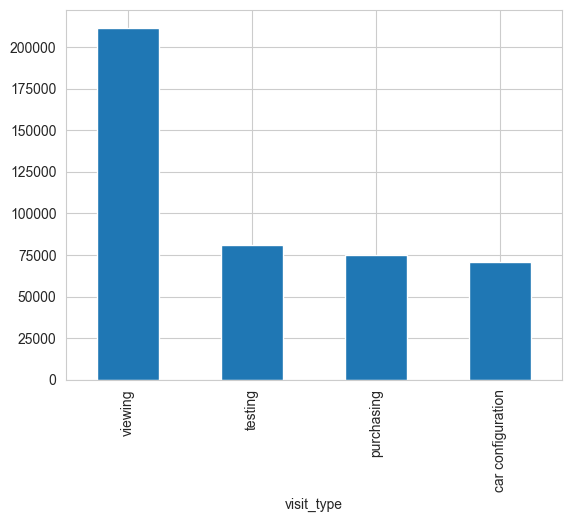

In [102]:
# visit type value counts
visits["visit_type"].value_counts().plot(kind="bar")

In [103]:
# get the percentage of transaction_id nans
print(f"Percentage of avaiable transaction_id: {(1-visits['transaction_id'].isnull().mean()) * 100:.2f}%")

Percentage of avaiable transaction_id: 17.05%


### 2.4.2) Null analysis

In [104]:
# print the nulls
visits.isnull().sum()

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
dtype: int64

Everything seems allright, we can save it

In [105]:
# save the cleaned data
visits.to_csv('Cleaned_Data/visits.csv', index=False)